In [109]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("./graduate-admissions/Admission_Predict.csv")

In [110]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [111]:
cgpa = dataset["CGPA"]
gre = dataset["GRE Score"]
toefl = dataset["TOEFL Score"]

In [112]:
def predict(cgpa, weight, bias):
    return cgpa*weight + bias

In [113]:
def calc_mse(cgpa, gre, weight, bias):
    num_students = len(cgpa)
    total_err = 0.0
    for i in range(num_students):
        total_err += (gre[i] - (weight*cgpa[i] + bias))*(gre[i] - (weight*cgpa[i] + bias))
    return total_err/num_students

In [114]:
def update_weights(cgpa, gre, weight, bias, learning_rate):
    w_der = 0.0
    b_der = 0.0
    num_students = len(cgpa)
    for i in range(num_students):
        w_der += -2*cgpa[i]*(gre[i]-(weight*cgpa[i] + bias))
        b_der += -2*(gre[i]-(weight*cgpa[i] + bias))
        
    weight = weight - (w_der/num_students)*learning_rate
    bias = bias - (b_der/num_students)*learning_rate
    return weight, bias

In [118]:
def train(cgpa, gre, weight, bias, learning_rate, reps):
    for i in range(reps):
        err = calc_mse(cgpa, gre, weight, bias)
        weight, bias = update_weights(cgpa, gre, weight, bias, learning_rate)
        print("iter: {} error: {:.2f} weight: {:.4f} bias: {:.4f}\n".format(i, err, weight, bias))
        
    return weight, bias

In [122]:
weight, bias = train(cgpa, gre, 30, 10, 0.01, 1200)

iter: 0 error: 2494.74 weight: 38.3003 bias: 10.9768

iter: 1 error: 768.87 weight: 34.0990 bias: 10.5066

iter: 2 error: 327.26 weight: 36.2214 bias: 10.7683

iter: 3 error: 214.25 weight: 35.1450 bias: 10.6598

iter: 4 error: 185.31 weight: 35.6867 bias: 10.7386

iter: 5 error: 177.89 weight: 35.4099 bias: 10.7226

iter: 6 error: 175.97 weight: 35.5472 bias: 10.7545

iter: 7 error: 175.46 weight: 35.4750 bias: 10.7623

iter: 8 error: 175.31 weight: 35.5087 bias: 10.7822

iter: 9 error: 175.26 weight: 35.4889 bias: 10.7960

iter: 10 error: 175.22 weight: 35.4962 bias: 10.8129

iter: 11 error: 175.20 weight: 35.4897 bias: 10.8282

iter: 12 error: 175.17 weight: 35.4902 bias: 10.8443

iter: 13 error: 175.14 weight: 35.4872 bias: 10.8600

iter: 14 error: 175.12 weight: 35.4860 bias: 10.8759

iter: 15 error: 175.09 weight: 35.4839 bias: 10.8917

iter: 16 error: 175.07 weight: 35.4822 bias: 10.9076

iter: 17 error: 175.04 weight: 35.4803 bias: 10.9234

iter: 18 error: 175.02 weight: 35.478

iter: 151 error: 171.68 weight: 35.2362 bias: 13.0320

iter: 152 error: 171.65 weight: 35.2344 bias: 13.0476

iter: 153 error: 171.63 weight: 35.2326 bias: 13.0632

iter: 154 error: 171.61 weight: 35.2308 bias: 13.0789

iter: 155 error: 171.58 weight: 35.2290 bias: 13.0945

iter: 156 error: 171.56 weight: 35.2272 bias: 13.1101

iter: 157 error: 171.53 weight: 35.2254 bias: 13.1258

iter: 158 error: 171.51 weight: 35.2236 bias: 13.1414

iter: 159 error: 171.48 weight: 35.2218 bias: 13.1570

iter: 160 error: 171.46 weight: 35.2200 bias: 13.1726

iter: 161 error: 171.43 weight: 35.2181 bias: 13.1883

iter: 162 error: 171.41 weight: 35.2163 bias: 13.2039

iter: 163 error: 171.38 weight: 35.2145 bias: 13.2195

iter: 164 error: 171.36 weight: 35.2127 bias: 13.2351

iter: 165 error: 171.33 weight: 35.2109 bias: 13.2507

iter: 166 error: 171.31 weight: 35.2091 bias: 13.2664

iter: 167 error: 171.28 weight: 35.2073 bias: 13.2820

iter: 168 error: 171.26 weight: 35.2055 bias: 13.2976

iter: 169 

iter: 302 error: 167.99 weight: 34.9649 bias: 15.3764

iter: 303 error: 167.97 weight: 34.9631 bias: 15.3918

iter: 304 error: 167.94 weight: 34.9613 bias: 15.4072

iter: 305 error: 167.92 weight: 34.9595 bias: 15.4226

iter: 306 error: 167.89 weight: 34.9577 bias: 15.4380

iter: 307 error: 167.87 weight: 34.9560 bias: 15.4534

iter: 308 error: 167.85 weight: 34.9542 bias: 15.4688

iter: 309 error: 167.82 weight: 34.9524 bias: 15.4842

iter: 310 error: 167.80 weight: 34.9506 bias: 15.4996

iter: 311 error: 167.77 weight: 34.9488 bias: 15.5150

iter: 312 error: 167.75 weight: 34.9470 bias: 15.5304

iter: 313 error: 167.73 weight: 34.9453 bias: 15.5458

iter: 314 error: 167.70 weight: 34.9435 bias: 15.5612

iter: 315 error: 167.68 weight: 34.9417 bias: 15.5766

iter: 316 error: 167.65 weight: 34.9399 bias: 15.5920

iter: 317 error: 167.63 weight: 34.9381 bias: 15.6074

iter: 318 error: 167.61 weight: 34.9364 bias: 15.6228

iter: 319 error: 167.58 weight: 34.9346 bias: 15.6382

iter: 320 

iter: 452 error: 164.43 weight: 34.6991 bias: 17.6724

iter: 453 error: 164.40 weight: 34.6974 bias: 17.6876

iter: 454 error: 164.38 weight: 34.6956 bias: 17.7028

iter: 455 error: 164.36 weight: 34.6938 bias: 17.7180

iter: 456 error: 164.33 weight: 34.6921 bias: 17.7332

iter: 457 error: 164.31 weight: 34.6903 bias: 17.7484

iter: 458 error: 164.29 weight: 34.6886 bias: 17.7636

iter: 459 error: 164.26 weight: 34.6868 bias: 17.7788

iter: 460 error: 164.24 weight: 34.6851 bias: 17.7940

iter: 461 error: 164.22 weight: 34.6833 bias: 17.8091

iter: 462 error: 164.19 weight: 34.6815 bias: 17.8243

iter: 463 error: 164.17 weight: 34.6798 bias: 17.8395

iter: 464 error: 164.15 weight: 34.6780 bias: 17.8547

iter: 465 error: 164.12 weight: 34.6763 bias: 17.8699

iter: 466 error: 164.10 weight: 34.6745 bias: 17.8851

iter: 467 error: 164.08 weight: 34.6728 bias: 17.9002

iter: 468 error: 164.05 weight: 34.6710 bias: 17.9154

iter: 469 error: 164.03 weight: 34.6692 bias: 17.9306

iter: 470 

iter: 602 error: 160.97 weight: 34.4371 bias: 19.9362

iter: 603 error: 160.94 weight: 34.4354 bias: 19.9512

iter: 604 error: 160.92 weight: 34.4336 bias: 19.9662

iter: 605 error: 160.90 weight: 34.4319 bias: 19.9812

iter: 606 error: 160.87 weight: 34.4302 bias: 19.9962

iter: 607 error: 160.85 weight: 34.4284 bias: 20.0112

iter: 608 error: 160.83 weight: 34.4267 bias: 20.0261

iter: 609 error: 160.81 weight: 34.4250 bias: 20.0411

iter: 610 error: 160.78 weight: 34.4232 bias: 20.0561

iter: 611 error: 160.76 weight: 34.4215 bias: 20.0711

iter: 612 error: 160.74 weight: 34.4198 bias: 20.0860

iter: 613 error: 160.72 weight: 34.4180 bias: 20.1010

iter: 614 error: 160.69 weight: 34.4163 bias: 20.1160

iter: 615 error: 160.67 weight: 34.4146 bias: 20.1309

iter: 616 error: 160.65 weight: 34.4128 bias: 20.1459

iter: 617 error: 160.62 weight: 34.4111 bias: 20.1609

iter: 618 error: 160.60 weight: 34.4094 bias: 20.1758

iter: 619 error: 160.58 weight: 34.4076 bias: 20.1908

iter: 620 

iter: 753 error: 157.58 weight: 34.1770 bias: 22.1831

iter: 754 error: 157.55 weight: 34.1753 bias: 22.1979

iter: 755 error: 157.53 weight: 34.1736 bias: 22.2126

iter: 756 error: 157.51 weight: 34.1719 bias: 22.2274

iter: 757 error: 157.49 weight: 34.1702 bias: 22.2422

iter: 758 error: 157.47 weight: 34.1685 bias: 22.2569

iter: 759 error: 157.44 weight: 34.1668 bias: 22.2717

iter: 760 error: 157.42 weight: 34.1651 bias: 22.2865

iter: 761 error: 157.40 weight: 34.1634 bias: 22.3012

iter: 762 error: 157.38 weight: 34.1616 bias: 22.3160

iter: 763 error: 157.36 weight: 34.1599 bias: 22.3308

iter: 764 error: 157.33 weight: 34.1582 bias: 22.3455

iter: 765 error: 157.31 weight: 34.1565 bias: 22.3603

iter: 766 error: 157.29 weight: 34.1548 bias: 22.3750

iter: 767 error: 157.27 weight: 34.1531 bias: 22.3898

iter: 768 error: 157.25 weight: 34.1514 bias: 22.4045

iter: 769 error: 157.22 weight: 34.1497 bias: 22.4193

iter: 770 error: 157.20 weight: 34.1480 bias: 22.4340

iter: 771 

iter: 902 error: 154.33 weight: 33.9240 bias: 24.3690

iter: 903 error: 154.30 weight: 33.9223 bias: 24.3836

iter: 904 error: 154.28 weight: 33.9206 bias: 24.3982

iter: 905 error: 154.26 weight: 33.9190 bias: 24.4127

iter: 906 error: 154.24 weight: 33.9173 bias: 24.4273

iter: 907 error: 154.22 weight: 33.9156 bias: 24.4419

iter: 908 error: 154.20 weight: 33.9139 bias: 24.4564

iter: 909 error: 154.18 weight: 33.9122 bias: 24.4710

iter: 910 error: 154.15 weight: 33.9105 bias: 24.4855

iter: 911 error: 154.13 weight: 33.9088 bias: 24.5001

iter: 912 error: 154.11 weight: 33.9072 bias: 24.5147

iter: 913 error: 154.09 weight: 33.9055 bias: 24.5292

iter: 914 error: 154.07 weight: 33.9038 bias: 24.5438

iter: 915 error: 154.05 weight: 33.9021 bias: 24.5583

iter: 916 error: 154.03 weight: 33.9004 bias: 24.5729

iter: 917 error: 154.00 weight: 33.8987 bias: 24.5874

iter: 918 error: 153.98 weight: 33.8971 bias: 24.6020

iter: 919 error: 153.96 weight: 33.8954 bias: 24.6165

iter: 920 

iter: 1051 error: 151.17 weight: 33.6745 bias: 26.5245

iter: 1052 error: 151.14 weight: 33.6729 bias: 26.5389

iter: 1053 error: 151.12 weight: 33.6712 bias: 26.5533

iter: 1054 error: 151.10 weight: 33.6695 bias: 26.5676

iter: 1055 error: 151.08 weight: 33.6679 bias: 26.5820

iter: 1056 error: 151.06 weight: 33.6662 bias: 26.5963

iter: 1057 error: 151.04 weight: 33.6646 bias: 26.6107

iter: 1058 error: 151.02 weight: 33.6629 bias: 26.6251

iter: 1059 error: 151.00 weight: 33.6612 bias: 26.6394

iter: 1060 error: 150.98 weight: 33.6596 bias: 26.6538

iter: 1061 error: 150.96 weight: 33.6579 bias: 26.6681

iter: 1062 error: 150.94 weight: 33.6562 bias: 26.6825

iter: 1063 error: 150.92 weight: 33.6546 bias: 26.6968

iter: 1064 error: 150.89 weight: 33.6529 bias: 26.7112

iter: 1065 error: 150.87 weight: 33.6513 bias: 26.7255

iter: 1066 error: 150.85 weight: 33.6496 bias: 26.7399

iter: 1067 error: 150.83 weight: 33.6479 bias: 26.7542

iter: 1068 error: 150.81 weight: 33.6463 bias: 2

In [123]:
print(weight)
print(bias)
trained_gre = [element*weight + bias for element in cgpa]

33.43015841485957
28.63580337828258


<IPython.core.display.Javascript object>


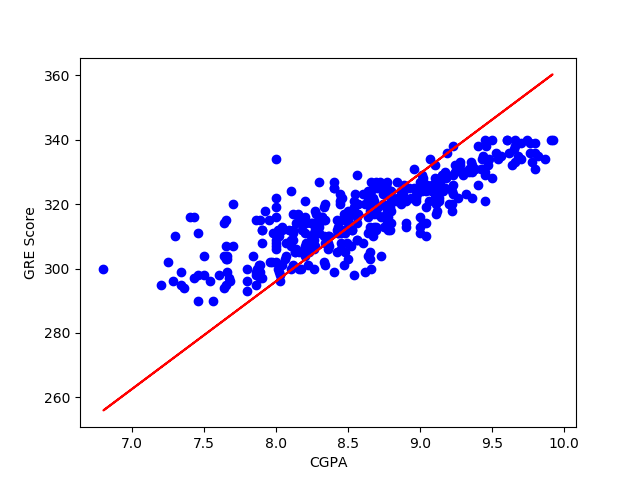

In [124]:
plt.scatter(cgpa, gre, color = 'blue')
plt.plot(cgpa, trained_gre, color = 'red')
plt.xlabel('CGPA')
plt.ylabel('GRE Score')
plt.show()